<a href="https://colab.research.google.com/github/HandsomeJames0223/Deep_Learning/blob/main/mlp_fashion_mnist(109_10_19).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Bag


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,88,132,111,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,75,201,189,164,180,201,94,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,3,0,87,195,47,0,0,0,13,178,92,0,8,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,3,0,49,208,0,0,0,0,0,0,12,206,12,0,5,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,172,113,0,9,0,0,0,6,0,146,142,0,10,0,0,0,0,0,0,0
5,0,0,0,0,0,5,0,46,209,6,0,3,0,0,0,1,0,71,201,0,0,4,0,0,0,0,0,0
6,0,0,0,0,0,7,0,109,187,0,0,3,3,1,1,3,0,0,208,46,0,5,0,0,0,0,0,0
7,0,0,0,0,0,0,0,142,160,0,0,0,0,0,0,1,0,0,198,77,0,6,0,0,0,0,0,0
8,0,0,0,0,0,0,0,140,148,0,2,0,0,0,0,0,0,0,195,89,0,2,0,0,0,0,0,0
9,0,0,0,0,0,1,0,105,150,0,0,3,1,3,4,4,0,0,186,93,0,1,0,0,0,0,0,0


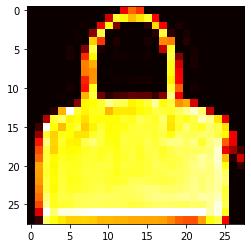

In [ ]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import random
import matplotlib.pyplot as plt
import pandas as pd
titlelist = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
idx = random.randint(0, 59999)
plt.imshow(x_train[idx], cmap="hot")
print(titlelist[y_train[idx]])
pd.DataFrame(x_train[idx])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout
layers = [
    # 784 * 128 + 128 
    Dense(512, activation="relu", input_dim=784),
    Dropout(0.25),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# x: scaling 0-255 -> 0-1 框架(tf)隨機係數的關係
# y: one-hot encoding 十個答案
from tensorflow.keras.utils import to_categorical
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
# y_train_cat = to_categorical(y_train, 10)
# y_test_cat = to_categorical(y_test, 10)
print(y_train[0], y_train_cat[0])
# x_train_norm[0]

9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
# 一個神經元: binary crossentropy p log 1/q + (1-p) log 1/(1-q)
# 多個神經元: categorical crossentropy p1 log 1/q1 +.....
# SparseCategoricalCrossentropy可以減少RAM的的使用
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [ ]:
# batch: 100`200(小圖片) 10`20(大圖片)
# epoch: 整份資料要看幾遍
# 60000筆, 2epoch, 200batch -> 60000 * 2 / 200次調整
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm, 
     y_train,
     batch_size=100,
     epochs=50,
     validation_split=0.1,
     callbacks=callbacks,
     verbose=2)

Epoch 1/50
540/540 - 4s - loss: 0.5324 - accuracy: 0.8115 - val_loss: 0.3900 - val_accuracy: 0.8568
Epoch 2/50
540/540 - 4s - loss: 0.3953 - accuracy: 0.8578 - val_loss: 0.3745 - val_accuracy: 0.8630
Epoch 3/50
540/540 - 4s - loss: 0.3596 - accuracy: 0.8696 - val_loss: 0.3414 - val_accuracy: 0.8748
Epoch 4/50
540/540 - 4s - loss: 0.3323 - accuracy: 0.8791 - val_loss: 0.3360 - val_accuracy: 0.8787
Epoch 5/50
540/540 - 4s - loss: 0.3175 - accuracy: 0.8829 - val_loss: 0.3291 - val_accuracy: 0.8795
Epoch 6/50
540/540 - 3s - loss: 0.3047 - accuracy: 0.8884 - val_loss: 0.3337 - val_accuracy: 0.8783
Epoch 7/50
540/540 - 4s - loss: 0.2926 - accuracy: 0.8919 - val_loss: 0.3215 - val_accuracy: 0.8820
Epoch 8/50
540/540 - 4s - loss: 0.2827 - accuracy: 0.8948 - val_loss: 0.3197 - val_accuracy: 0.8882
Epoch 9/50
540/540 - 4s - loss: 0.2741 - accuracy: 0.8986 - val_loss: 0.3157 - val_accuracy: 0.8830
Epoch 10/50
540/540 - 4s - loss: 0.2675 - accuracy: 0.9005 - val_loss: 0.3037 - val_accuracy: 0.8903

In [ ]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3199 - accuracy: 0.8926


[0.31993457674980164, 0.8925999999046326]

In [ ]:
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      index=["{}(原本)".format(n) for n in titlelist],
      columns=["{}(預測)".format(n) for n in titlelist])

,T-shirt/top(預測),Trouser(預測),Pullover(預測),Dress(預測),Coat(預測),Sandal(預測),Shirt(預測),Sneaker(預測),Bag(預測),Ankle boot(預測)
T-shirt/top(原本),844,0,28,20,8,1,93,0,6,0
Trouser(原本),4,970,1,19,3,0,1,0,2,0
Pullover(原本),8,0,832,11,100,0,49,0,0,0
Dress(原本),23,2,15,895,37,0,23,0,5,0
Coat(原本),0,0,85,23,842,0,49,0,1,0
Sandal(原本),0,0,0,0,0,972,0,16,1,11
Shirt(原本),121,1,94,34,70,0,672,0,8,0
Sneaker(原本),0,0,0,0,0,12,0,961,0,27
Bag(原本),3,0,3,3,5,2,3,3,978,0
Ankle boot(原本),0,0,0,0,0,8,1,31,0,960


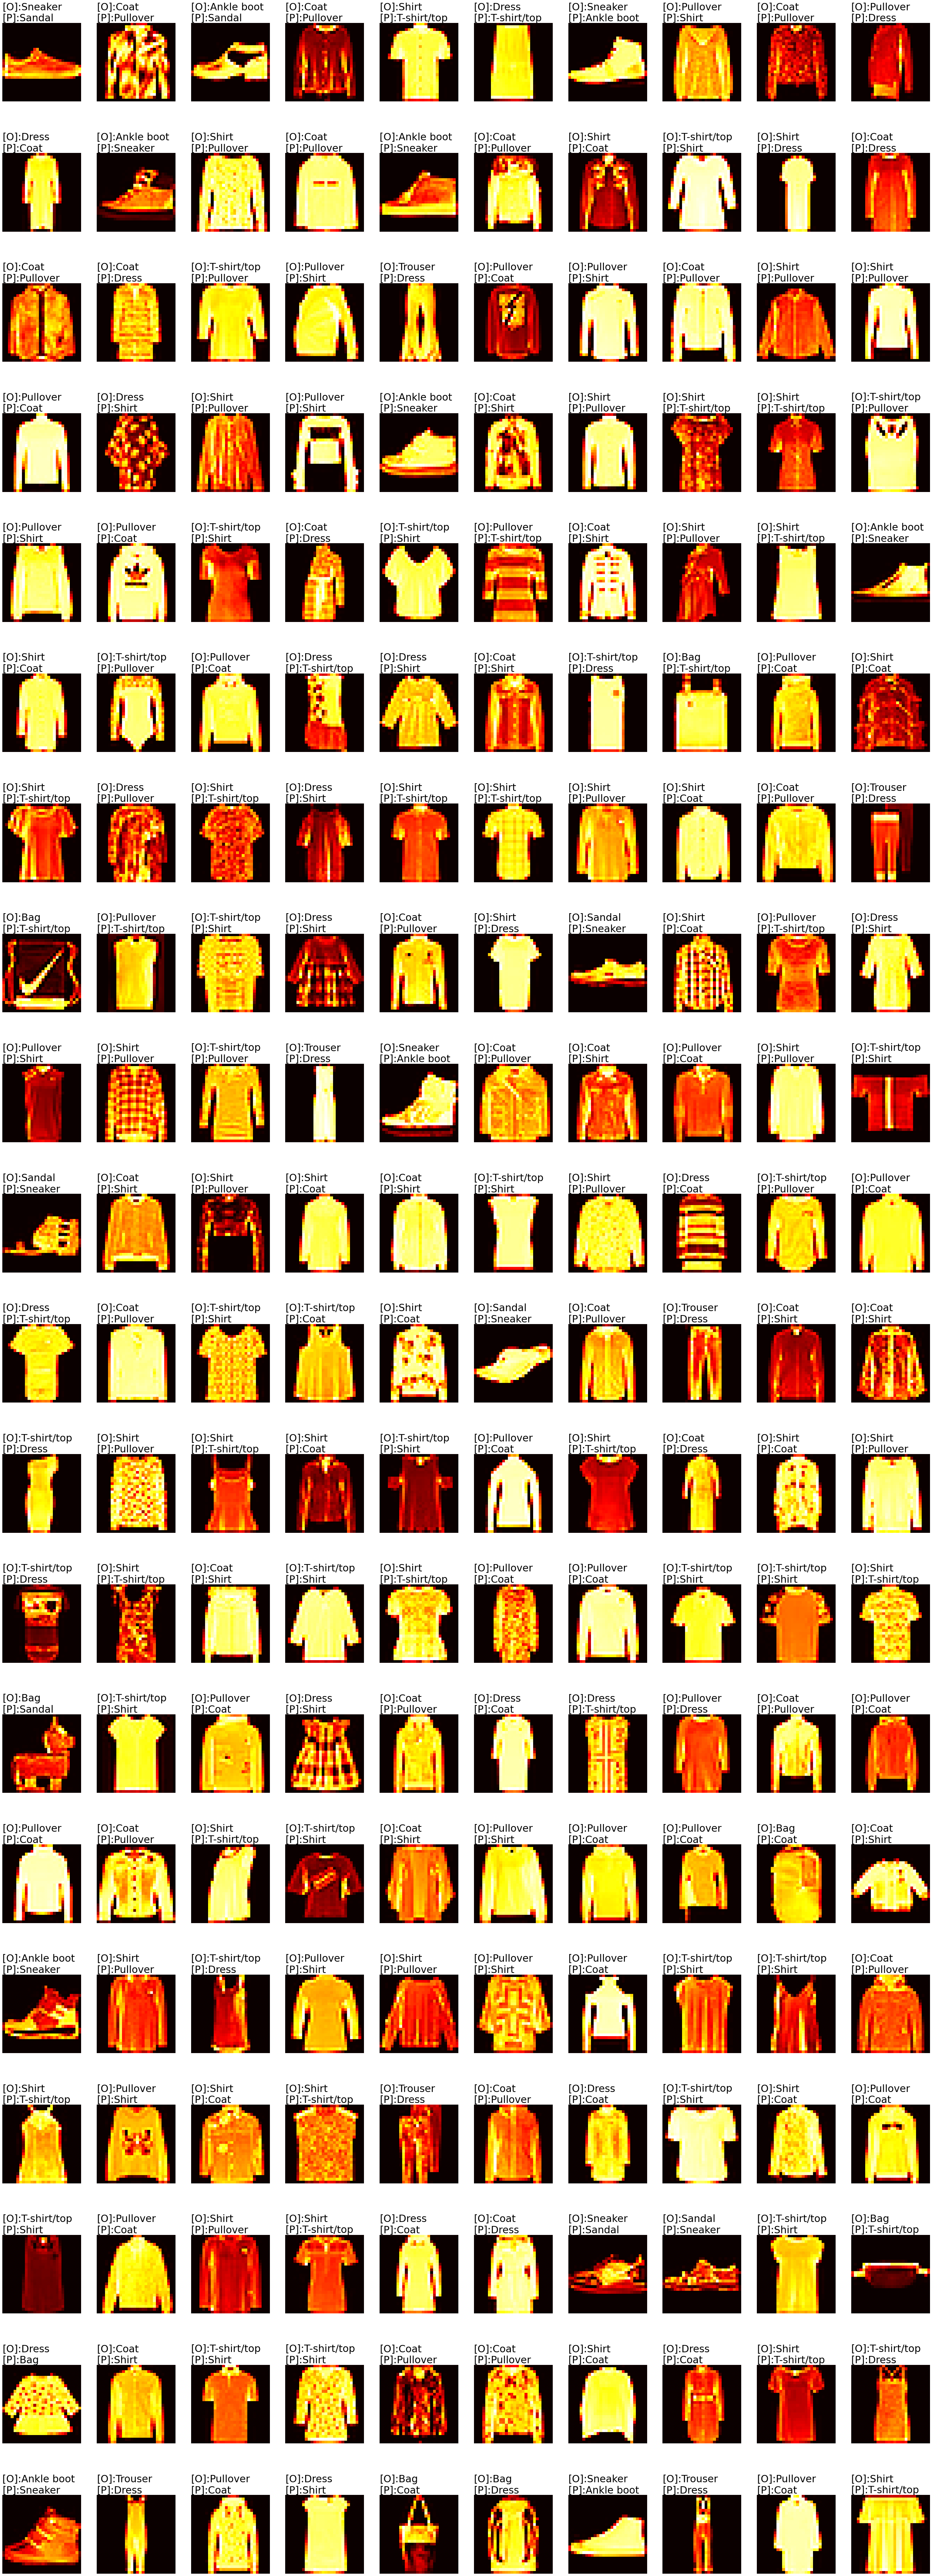

In [ ]:
# subplot(總高度, 總寬度, ith)
import numpy as np
idx = np.nonzero(pre != y_test)[0]
idx = idx[:200]
false_img = x_test[idx]
false_label = y_test[idx]
false_pre = pre[idx]


plt.figure(figsize=(50, 150))
width = 10
height = len(false_img) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[O]:{}\n[P]:{}".format(titlelist[false_label[i]], titlelist[false_pre[i]])
    plt.title(title, fontsize=30, loc='left')
    plt.axis("off")
    plt.imshow(false_img[i], cmap = "hot")

# 重點:
# 1. Sparsecrossentropy
# 2. Dropout